## 비행기 승객 예측 - 시계열 분석 연습 1
[참고블로그](https://blog.naver.com/PostView.nhn?blogId=makeydrew&logNo=221400031097&parentCategoryNo=&categoryNo=6&viewDate=&isShowPopularPosts=true&from=search)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob
import gc

In [21]:
import requests
import csv
#pd.read_csv('https://github.com/dacatay/time-series-analysis/blob/master/data/passengers.csv', sep=';')
file_path = 'C:/Users/wjdqh/Desktop/DataScience/practice_data/passengers.csv'
data = pd.read_csv(file_path, sep=';', header = 0, index_col = 0, squeeze = True) #  squeeze : 로우가 하나뿐이라면 Series객체를 반환한다. 기본값은 False
data

month
1949-01    112
1949-02    118
1949-03    132
1949-04    129
1949-05    121
          ... 
1960-08    606
1960-09    508
1960-10    461
1960-11    390
1960-12    432
Name: n_passengers, Length: 144, dtype: int64

In [22]:
type(data) # arima가 인식할 수 있도록 series로 데이터를 가져온다.

pandas.core.series.Series

<AxesSubplot:xlabel='month'>

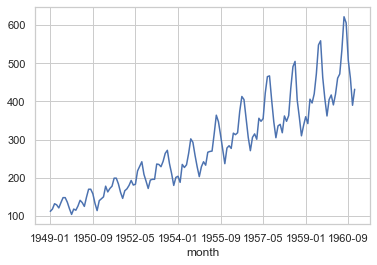

In [23]:
%matplotlib inline
data.plot()

In [28]:
list(data.index)  # 1949.1 ~ 1960.12 
print(len(list(data.index)))

144


### 1960년도 예측을 목표로 한다.

In [34]:
data_using = data[:132]

data_using

month
1949-01    112
1949-02    118
1949-03    132
1949-04    129
1949-05    121
          ... 
1959-08    559
1959-09    463
1959-10    407
1959-11    362
1959-12    405
Name: n_passengers, Length: 132, dtype: int64

In [38]:
# arima는 data type을 float으로 주어야한다.
data_using = data_using.astype(float)

type(data_using.values[0])  # int64 에서 float64로 변환된것 확인

numpy.float64

In [39]:
data_using.head(3)

month
1949-01    112.0
1949-02    118.0
1949-03    132.0
Name: n_passengers, dtype: float64

<AxesSubplot:xlabel='month'>

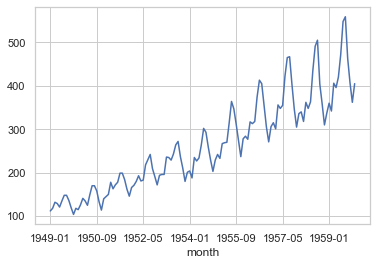

In [40]:
data_using.plot()

In [48]:
data_using

month
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
           ...  
1959-08    559.0
1959-09    463.0
1959-10    407.0
1959-11    362.0
1959-12    405.0
Name: n_passengers, Length: 132, dtype: float64

#### 데이터가 비정상성을 가지고 있다.
- 1. 시계열의 평균이 일정하지 않은 경우 : 원시계열에 차분을 한다.
- 2. 분산이 일정하지 않는 경우에는 원시계열에 자연로그(변환)를 취한다.
- 3. 계절성을 갖는 원시계열은 계절차분을 사용한다.

#### 비정상성 -> 정상성을 위해서는 차분or변환을 해야하는데, acf와 pacf를 알고 이용하여 p(AR)와 q(MA)를 설정해야 한다.
[개념참고](https://direction-f.tistory.com/65)

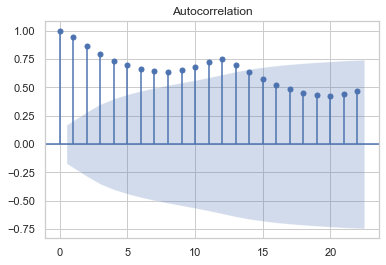

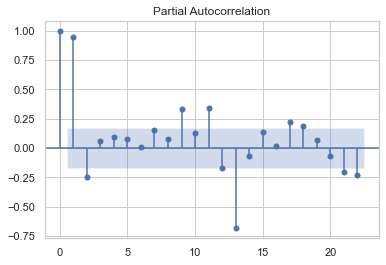

<Figure size 1440x288 with 0 Axes>

In [45]:
# acf, pacf plot 라이브러리를 import
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data_using)  # 왜 음으로 변하는 포인트가 없지..? 똑같은 데이터를 썼는데, 참고블로그의 결과와 다르다;
plot_pacf(data_using)
plt.figure(figsize = (20,4))
plt.show()

#### acf값이 천천히 감소하는 것은 정상성을 만족하지 않는다는 것을 의미한다. 1차 차분을 해줘본다.
[참고블로그](https://leedakyeong.tistory.com/entry/Python-%EB%82%A0%EC%94%A8-%EC%8B%9C%EA%B3%84%EC%97%B4-%EB%8D%B0%EC%9D%B4%ED%84%B0Kaggle%EB%A1%9C-ARIMA-%EC%A0%81%EC%9A%A9%ED%95%98%EA%B8%B0)

<AxesSubplot:xlabel='month'>

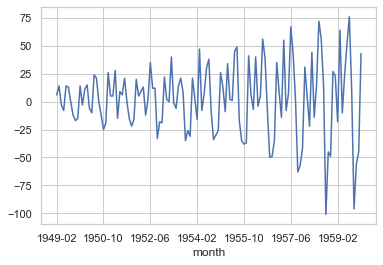

In [54]:
data_using_diff = data_using.diff().iloc[1:]
data_using_diff.plot()
# 음... 딱히 나아져 보이지 않는다.

<AxesSubplot:xlabel='month'>

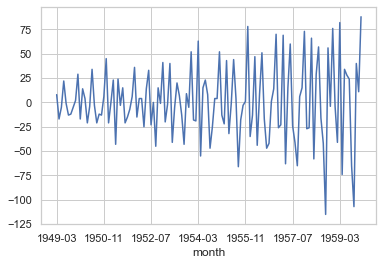

In [57]:
# 2차 차분
data_using_diff2 = data_using_diff.diff().dropna()
data_using_diff2.plot()


In [55]:
data_using_diff.head()

month
1949-02     6.0
1949-03    14.0
1949-04    -3.0
1949-05    -8.0
1949-06    14.0
Name: n_passengers, dtype: float64

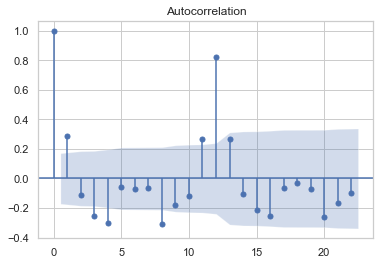

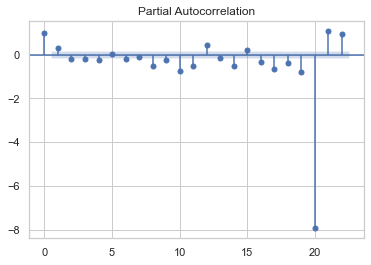

<Figure size 1440x288 with 0 Axes>

In [56]:
plot_acf(data_using_diff)  
plot_pacf(data_using_diff)
plt.figure(figsize = (20,4))
plt.show()

In [66]:
# plot_acf(data_using_diff2)  
# plot_pacf(data_using_diff2)
# plt.figure(figsize = (20,4))
# plt.show()

####  -확인내용-
- 차분 1차까지 진행하였다. (그래도 비정상성에서 못벗어난 것 같지만...)
- arima(0, 1, 5)
- ** p와 q를 설정하는 기준이 잘 이해가 안됨...

In [74]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

model = ARIMA(data_using, order = (0, 1, 5))
#trend : constant를 가지고 있는지, c - constant / nc - no constant
#disp : 수렴 정보를 나타냄
model_fit = model.fit(trend='c',full_output=True, disp=True)
print(model_fit.summary())

C:\Users\wjdqh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\wjdqh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                             ARIMA Model Results                              
Dep. Variable:         D.n_passengers   No. Observations:                  131
Model:                 ARIMA(0, 1, 5)   Log Likelihood                -598.920
Method:                       css-mle   S.D. of innovations             22.572
Date:                Wed, 08 Sep 2021   AIC                           1211.841
Time:                        00:46:06   BIC                           1231.967
Sample:                    02-01-1949   HQIC                          1220.019
                         - 12-01-1959                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.5565      0.164     15.583      0.000       2.235       2.878
ma.L1.D.n_passengers     0.1321      0.100      1.328      0.184      -0.063       0.327
ma.L2.D.n_pa

- p-value가 0이 나와버렸다..?!

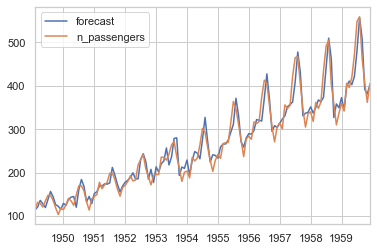

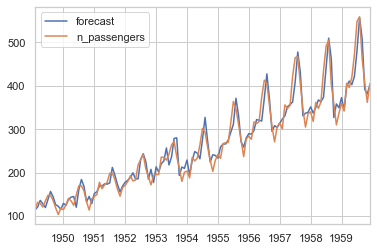

In [75]:
# arima모형이 예측한 결과를 그래프로 비교해보자.
model_fit.plot_predict()

In [76]:
forecast_data = model_fit.forecast(steps=12) # 학습 데이터셋으로부터 12달 뒤를 예측합니다.
pred_y = forecast_data[0].tolist()
pred_y

[438.79019669467544,
 425.06906982942223,
 445.5304148004735,
 439.52579638461265,
 443.10923434926923,
 445.66571793925385,
 448.2222015292385,
 450.7786851192231,
 453.3351687092077,
 455.89165229919234,
 458.44813588917697,
 461.0046194791616]

In [81]:
test_y = data[132:].values
test_y

array([417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390, 432],
      dtype=int64)

In [87]:
df = pd.DataFrame()
df['pred_y'] = pred_y
df['test_y'] = test_y.tolist()

df

,pred_y,test_y
0,438.790197,417
1,425.069070,391
2,445.530415,419
3,439.525796,461
4,443.109234,472
5,445.665718,535
6,448.222202,622
7,450.778685,606
8,453.335169,508
9,455.891652,461


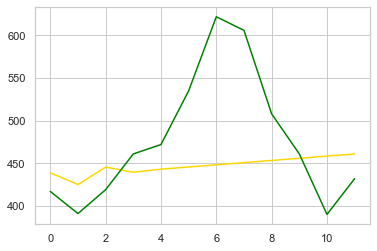

In [86]:
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.
plt.show()

### 편차가 꽤 크게 나왔다 ㅠ  다른 라이브러리를 이용하는 등 편차를 줄일 수 있는 방법이 있다고 하는데, 이는 2편에 이어서 연습해보려고 한다.
[2편참고예정블로그포스트](https://tjansry354.tistory.com/14)